#Importando os dados

Importando bibliotecas iniciais:

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Importando os datasets referentes aos estudos de evasão anos de 2012 a 2017:

In [2]:
m12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets filtrados/evasão_12.csv')
m13 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets filtrados/evasão_13.csv')
m14 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets filtrados/evasão_14.csv')
m15 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets filtrados/evasão_15.csv')
m16 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets filtrados/evasão_16.csv')
m12.drop(columns=['Unnamed: 0'], inplace=True)
m13.drop(columns=['Unnamed: 0'], inplace=True)
m14.drop(columns=['Unnamed: 0'], inplace=True)
m15.drop(columns=['Unnamed: 0'], inplace=True)
m16.drop(columns=['Unnamed: 0'], inplace=True)

Concatenando os datasets em um só:

In [200]:
evasao = pd.concat([m12, m13, m14, m15, m16])

In [4]:
evasao.columns.tolist()

['ID',
 'Idade',
 'Necessidade_especial',
 'Cegueira',
 'Baixa_visao',
 'Surdez',
 'Def_auditiva',
 'Surdocegueira',
 'Def_fisica',
 'Def_intelectual',
 'Def_multipla',
 'Autismo',
 'Asperger',
 'Rett',
 'Transtorno_DI',
 'Superdotacao',
 'Etapa_ensino',
 'ID_escola',
 'Status',
 'Etnia_Branca',
 'Etnia_Indígena',
 'Etnia_Não Declarada',
 'Etnia_Parda',
 'Etnia_Preta',
 'Nacionalidade_Brasileiro',
 'Nacionalidade_Extrangeiro',
 'Nacionalidade_Naturalizado',
 'Zona_res_Urbana',
 'Outro_local_aula_Hospital',
 'Outro_local_aula_Não recebe',
 'Unificada_Multi',
 'Unificada_Não',
 'Tipo_turma_Classe Hospitalar',
 'Tipo_turma_Não se aplica',
 'Tipo_turma_Unidade prisional',
 'Localizacao_Rural',
 'Localizacao_Urbana',
 'Administracao_Federal',
 'Administracao_Municipal',
 'Administracao_Privada',
 'Sexo_M',
 'Unificada_Multietapa']

Realizando ajustes finais no dataset

In [201]:
evasao = evasao.groupby('ID_escola').filter(lambda x : len(x)>10) #Retira as escolas com poucos alunos
evasao = pd.get_dummies(evasao, columns=['Status', 'Etapa_ensino'], drop_first=True)
evasao.drop(columns=['ID', 'Status_repetente'], inplace=True)
#evasao['ID_escola'] = evasao['ID_escola'].astype(str)
evasao = evasao.fillna(0)
evasao.head(5)

,Idade,Necessidade_especial,Cegueira,Baixa_visao,Surdez,Def_auditiva,Surdocegueira,Def_fisica,Def_intelectual,Def_multipla,Autismo,Asperger,Rett,Transtorno_DI,Superdotacao,ID_escola,Etnia_Branca,Etnia_Indígena,Etnia_Não Declarada,Etnia_Parda,Etnia_Preta,Nacionalidade_Brasileiro,Nacionalidade_Extrangeiro,Nacionalidade_Naturalizado,Zona_res_Urbana,Outro_local_aula_Hospital,Outro_local_aula_Não recebe,Unificada_Multi,Unificada_Não,Tipo_turma_Classe Hospitalar,Tipo_turma_Não se aplica,Tipo_turma_Unidade prisional,Localizacao_Rural,Localizacao_Urbana,Administracao_Federal,Administracao_Municipal,Administracao_Privada,Sexo_M,Unificada_Multietapa,Status_evadido,Etapa_ensino_2.0,Etapa_ensino_3.0,Etapa_ensino_4.0,Etapa_ensino_5.0,Etapa_ensino_6.0,Etapa_ensino_7.0,Etapa_ensino_8.0
0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41130170.0,0,0,0,1,0,1.0,0,0,1,0,1,0.0,1,0.0,1.0,0.0,0.0,1,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1
1,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41130669.0,1,0,0,0,0,1.0,0,0,1,0,1,0.0,1,0.0,1.0,0.0,0.0,1,0,0,0,0.0,0.0,1,0,0,0,0,1,0,0
2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41370627.0,1,0,0,0,0,1.0,0,0,1,0,1,0.0,1,0.0,1.0,0.0,0.0,1,0,0,0,0.0,0.0,0,0,0,0,0,0,1,0
3,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41132696.0,1,0,0,0,0,1.0,0,0,1,0,1,0.0,1,0.0,1.0,0.0,0.0,1,0,1,0,0.0,0.0,1,0,0,0,1,0,0,0
4,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41132602.0,0,0,1,0,0,1.0,0,0,1,0,1,0.0,1,0.0,1.0,0.0,0.0,1,0,0,1,0.0,0.0,0,0,0,0,0,1,0,0


Verificando se as idades estão coerentes e corrigindo:

In [202]:
evasao.Idade.describe()

count    824906.000000
mean         10.063864
std           2.668610
min           1.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          66.000000
Name: Idade, dtype: float64

In [203]:
evasao = evasao[evasao.Idade>5]
evasao = evasao[evasao.Idade<18]
evasao.head()

,Idade,Necessidade_especial,Cegueira,Baixa_visao,Surdez,Def_auditiva,Surdocegueira,Def_fisica,Def_intelectual,Def_multipla,Autismo,Asperger,Rett,Transtorno_DI,Superdotacao,ID_escola,Etnia_Branca,Etnia_Indígena,Etnia_Não Declarada,Etnia_Parda,Etnia_Preta,Nacionalidade_Brasileiro,Nacionalidade_Extrangeiro,Nacionalidade_Naturalizado,Zona_res_Urbana,Outro_local_aula_Hospital,Outro_local_aula_Não recebe,Unificada_Multi,Unificada_Não,Tipo_turma_Classe Hospitalar,Tipo_turma_Não se aplica,Tipo_turma_Unidade prisional,Localizacao_Rural,Localizacao_Urbana,Administracao_Federal,Administracao_Municipal,Administracao_Privada,Sexo_M,Unificada_Multietapa,Status_evadido,Etapa_ensino_2.0,Etapa_ensino_3.0,Etapa_ensino_4.0,Etapa_ensino_5.0,Etapa_ensino_6.0,Etapa_ensino_7.0,Etapa_ensino_8.0
0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41130170.0,0,0,0,1,0,1.0,0,0,1,0,1,0.0,1,0.0,1.0,0.0,0.0,1,0,0,0,0.0,0.0,0,0,0,0,0,0,0,1
1,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41130669.0,1,0,0,0,0,1.0,0,0,1,0,1,0.0,1,0.0,1.0,0.0,0.0,1,0,0,0,0.0,0.0,1,0,0,0,0,1,0,0
2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41370627.0,1,0,0,0,0,1.0,0,0,1,0,1,0.0,1,0.0,1.0,0.0,0.0,1,0,0,0,0.0,0.0,0,0,0,0,0,0,1,0
3,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41132696.0,1,0,0,0,0,1.0,0,0,1,0,1,0.0,1,0.0,1.0,0.0,0.0,1,0,1,0,0.0,0.0,1,0,0,0,1,0,0,0
4,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41132602.0,0,0,1,0,0,1.0,0,0,1,0,1,0.0,1,0.0,1.0,0.0,0.0,1,0,0,1,0.0,0.0,0,0,0,0,0,1,0,0


Salvando em novo csv:

In [292]:
evasao.to_csv('evasao3.csv')

#Preparação para aplicação de modelos de classificação

Verificando a homogeneidade do dataset em relação à evasão:

In [204]:
evasao['Status_evadido'].value_counts()/len(evasao)

0    0.920299
1    0.079701
Name: Status_evadido, dtype: float64

Deixando as amostras de teste homogêneas:

In [205]:
#Undersampling
y1 = evasao[evasao['Status_evadido']==1]
y0 = evasao[evasao['Status_evadido']==0]
y0_novo = y0.sample(n=len(y1))
y_novo = pd.concat([y1, y0_novo])
x_novo = y_novo.drop(columns=['Status_evadido']).values
y_novo = y_novo['Status_evadido'].values
print(x_novo.shape, y_novo.shape)

(131170, 46) (131170,)


Divisão em treino e teste:

In [206]:
from sklearn.model_selection import train_test_split
evasao_train, evasao_test, status_evadido_train, status_evadido_test = train_test_split(x_novo, y_novo, test_size = 0.2, random_state = 0)

Classificador Naive Bayes:

In [207]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
classifier_NB = GaussianNB()
classifier_NB.fit(evasao_train, status_evadido_train)
status_evadido_pred_NB = classifier_NB.predict(evasao_test)
acuracia_NB = accuracy_score(status_evadido_test, status_evadido_pred_NB)
print("Acuracia: ", acuracia_NB)
cm_NB = confusion_matrix(status_evadido_test, status_evadido_pred_NB)
print("Confusion Matrix: ")
print(cm_NB)

Acuracia:  0.5857284440039643
Confusion Matrix: 
[[8961 4192]
 [6676 6405]]


Classificador Random Forest:

In [220]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators =  10)
classifier_RF.fit(evasao_train, status_evadido_train)
status_evadido_pred_RF = classifier_RF.predict(evasao_test)
acuracia_RF = accuracy_score(status_evadido_test, status_evadido_pred_RF)
print("Acuracia: ", acuracia_RF)
cm_RF = confusion_matrix(status_evadido_test, status_evadido_pred_RF)
print("Confusion Matrix: ")
print(cm_RF)


Acuracia:  0.6199207135777998
Confusion Matrix: 
[[8444 4709]
 [5262 7819]]


Selecionando apenas as features mais importantes para o Random Forest com o SelectFromMoldel:

In [209]:
from sklearn.feature_selection import SelectFromModel
classifier_RF_opt1 = classifier_RF
model_RF = SelectFromModel(classifier_RF_opt1, prefit=True)
selectedColumns_RF = model_RF.get_support()
evasao_train_RF = model_RF.transform(evasao_train)
evasao_test_RF = model_RF.transform(evasao_test)
classifier_RF_opt1.fit(evasao_train_RF, status_evadido_train)
status_evadido_pred_RF = classifier_RF_opt1.predict(evasao_test_RF)
acuracia_RF = accuracy_score(status_evadido_test, status_evadido_pred_RF)
print("Acuracia: ", acuracia_RF)
cm_RF = confusion_matrix(status_evadido_test, status_evadido_pred_RF)
print("Confusion Matrix: ")
print(cm_RF)
newList = []
evasao_features = evasao.drop(columns=['Status_evadido'])
evasao_list = evasao_features.columns.to_list()
for i in range(len(selectedColumns_RF)):
  if(selectedColumns_RF[i]):
    newList.append(evasao_list[i])
print("Colunas selecionadas: ", newList)

Acuracia:  0.6453076160707479
Confusion Matrix: 
[[8754 4399]
 [4906 8175]]
Colunas selecionadas:  ['Idade', 'ID_escola', 'Tipo_turma_Não se aplica']


Otimizando o classificador Random Forest:

In [211]:
#Buscando melhores parâmetros- Random Forest
min_samples = [50, 70, 80, 90, 100, 110, 120, 130, 140, 150, 200, 250, 300, 350, 400, 500, 600, 700, 1000]
n_est = [100]
crit = ['entropy']
best_accuracy = 0
best_parameters = 0
for s in range(len(min_samples)):
  for n in range(len(n_est)):
    for c in range(len(crit)):
      print(s, n, c)
      print("n_estimators = ",  n_est[n], ", criterion = ", crit[c], ", min_samples_split = ", min_samples[s])
      classifier_RF1 = RandomForestClassifier(n_estimators = n_est[n], criterion = crit[c], min_samples_split = min_samples[s], random_state = 0)
      classifier_RF1.fit(evasao_train_RF, status_evadido_train)
      status_evadido_pred_RF1 = classifier_RF1.predict(evasao_test_RF)
      acuracia_RF1 = accuracy_score(status_evadido_test, status_evadido_pred_RF1)
      if(acuracia_RF1>best_accuracy):
        best_accuracy = acuracia_RF1
        best_parameters = (n_est[n], crit[c], n_est, min_samples[s])
      print("Acuracia: ", acuracia_RF1)
      cm_RF1 = confusion_matrix(status_evadido_test, status_evadido_pred_RF1)
      print("Confusion Matrix: ")
      print(cm_RF1)
print("Melhor acuracia: ", best_accuracy)
print("Parametros: ", best_parameters)

0 0 0
n_estimators =  100 , criterion =  entropy , min_samples_split =  50
Acuracia:  0.6523976519021117
Confusion Matrix: 
[[8972 4181]
 [4938 8143]]
1 0 0
n_estimators =  100 , criterion =  entropy , min_samples_split =  70
Acuracia:  0.6537699169017306
Confusion Matrix: 
[[9030 4123]
 [4960 8121]]
2 0 0
n_estimators =  100 , criterion =  entropy , min_samples_split =  80
Acuracia:  0.6545704048181749
Confusion Matrix: 
[[9052 4101]
 [4961 8120]]
3 0 0
n_estimators =  100 , criterion =  entropy , min_samples_split =  90
Acuracia:  0.654036746207212
Confusion Matrix: 
[[9070 4083]
 [4993 8088]]
4 0 0
n_estimators =  100 , criterion =  entropy , min_samples_split =  100
Acuracia:  0.6545704048181749
Confusion Matrix: 
[[9057 4096]
 [4966 8115]]
5 0 0
n_estimators =  100 , criterion =  entropy , min_samples_split =  110
Acuracia:  0.6540748646794237
Confusion Matrix: 
[[9073 4080]
 [4995 8086]]
6 0 0
n_estimators =  100 , criterion =  entropy , min_samples_split =  120
Acuracia:  0.6549

Usando classificador Random Forest otimizado:

In [212]:
#melhores parâmetros- Random Forest
p1, p2, p3, p4 = best_parameters
classifier_RF_opt2 = RandomForestClassifier(n_estimators =  1000 , criterion = p2 , min_samples_split =  p4, random_state = 0, verbose=True)
classifier_RF_opt2.fit(evasao_train_RF, status_evadido_train)
status_evadido_pred_RF_opt2 = classifier_RF_opt2.predict(evasao_test_RF)
acuracia_RF_opt2 = accuracy_score(status_evadido_test, status_evadido_pred_RF_opt2)
print("Acuracia: ", acuracia_RF_opt2)
cm_RF_opt2= confusion_matrix(status_evadido_test, status_evadido_pred_RF_opt2)
print("Confusion Matrix: ")
print(cm_RF_opt2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Acuracia:  0.6545322863459633
Confusion Matrix: 
[[9082 4071]
 [4992 8089]]


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.0s finished


Usando GridSearchCV:


In [214]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': [3, 4, 5],
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [90, 100, 110, 120],
    'n_estimators': [100]
}
# Create a based model
classifier_RF_opt = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier_RF1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(evasao_train, status_evadido_train)
bestParameters = grid_search.best_params_
print("Best parameters: ", bestParameters)
classifier_RF_opt3 = grid_search.best_estimator_
status_evadido_pred_RF3 = classifier_RF_opt3.predict(evasao_test)
acuracia_RF3 = accuracy_score(status_evadido_test, status_evadido_pred_RF3)
print("Best Accuracy: ", acuracia_RF3)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 11.2min finished


Best parameters:  {'bootstrap': True, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 90, 'n_estimators': 100}
Best Accuracy:  0.6567050392620264


In [215]:
classifier_RF_opt3 = RandomForestClassifier(bootstrap= True, n_estimators =  100 , max_features = 4, min_samples_leaf = 2, min_samples_split =  90, random_state = 0, verbose=True)
classifier_RF_opt3.fit(evasao_train, status_evadido_train)
status_evadido_pred_RF_opt3 = classifier_RF_opt3.predict(evasao_test)
acuracia_RF_opt3 = accuracy_score(status_evadido_test, status_evadido_pred_RF_opt3)
print("Acuracia: ", acuracia_RF_opt3)
cm_RF_opt3= confusion_matrix(status_evadido_test, status_evadido_pred_RF_opt3)
print("Confusion Matrix: ")
print(cm_RF_opt3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Acuracia:  0.6565906838453914
Confusion Matrix: 
[[8809 4344]
 [4665 8416]]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Classificador XGBoost

In [216]:
#XGBoost
from xgboost import XGBClassifier
classifier_XG = XGBClassifier(objective = 'binary:logistic')
classifier_XG.fit(evasao_train, status_evadido_train)
status_evadido_pred_XG = classifier_XG.predict(evasao_test)
acuracia_XG = accuracy_score(status_evadido_test, status_evadido_pred_XG)
print("Acuracia: ", acuracia_XG)
cm_XG = confusion_matrix(status_evadido_test, status_evadido_pred_XG)
print("Confusion Matrix: ")
print(cm_XG)

Acuracia:  0.6545704048181749
Confusion Matrix: 
[[9051 4102]
 [4960 8121]]


Classificador XGBoost otimizado:

In [217]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import xgboost as xgb

classifier_XG_opt = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
kfold_5 = KFold(n_splits = numFolds, shuffle=True)

classifier_XG_opt = RandomizedSearchCV(classifier_XG_opt, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5,
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)
classifier_XG_opt.fit(evasao_train, status_evadido_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 34.4min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logisti...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f65be02f310>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        '

In [218]:
status_evadido_pred_XG_opt = classifier_XG_opt.predict(evasao_test)
acuracia_XG_opt = accuracy_score(status_evadido_test, status_evadido_pred_XG_opt)
print("Acuracia: ", acuracia_XG_opt)
cm_XG_opt = confusion_matrix(status_evadido_test, status_evadido_pred_XG_opt)
print("Confusion Matrix: ")
print(cm_XG_opt)
classifier_XG_opt.best_estimator_.feature_importances_

Acuracia:  0.6659678280094534
Confusion Matrix: 
[[9191 3962]
 [4801 8280]]


array([0.1756093 , 0.01407854, 0.0111491 , 0.00682807, 0.00881772,
       0.00511879, 0.        , 0.00719667, 0.02957932, 0.00552327,
       0.00440024, 0.00594617, 0.        , 0.00889477, 0.00455882,
       0.02150122, 0.01861795, 0.0061751 , 0.01099941, 0.01326991,
       0.0060754 , 0.03057207, 0.05597121, 0.01585757, 0.00734625,
       0.00345893, 0.01042406, 0.        , 0.0119278 , 0.        ,
       0.09052552, 0.        , 0.        , 0.00640225, 0.0172474 ,
       0.09831258, 0.04615154, 0.00923586, 0.        , 0.01463678,
       0.00953741, 0.02416699, 0.06551265, 0.0267571 , 0.03530545,
       0.05631077], dtype=float32)

Plotando a curva ROC e calculando o AUC:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


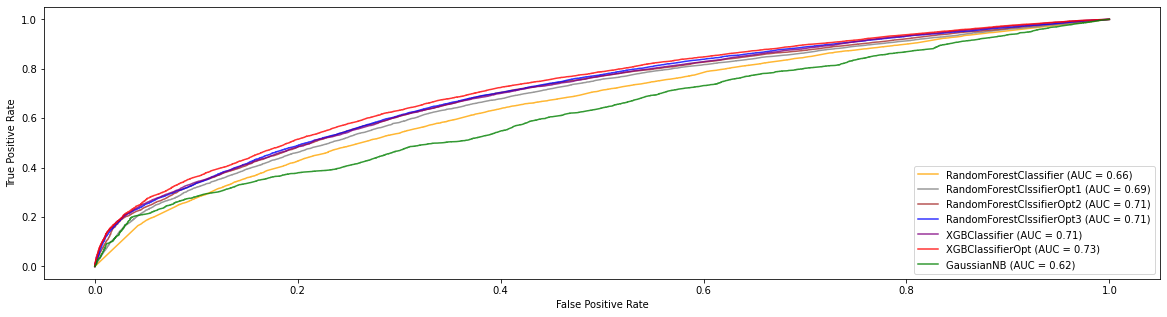

In [221]:
#ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
ax = plt.gca()
rfc_disp = plot_roc_curve(classifier_RF, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'orange')
rfc_disp_opt = plot_roc_curve(classifier_RF_opt1, evasao_test_RF, status_evadido_test, ax=ax, alpha=0.8, color = 'gray', name='RandomForestClssifierOpt1')
rfc_disp_opt = plot_roc_curve(classifier_RF_opt2, evasao_test_RF, status_evadido_test, ax=ax, alpha=0.8, color = 'brown', name='RandomForestClssifierOpt2')
rfc_disp_opt = plot_roc_curve(classifier_RF_opt3, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'blue', name='RandomForestClssifierOpt3')
xg_disp = plot_roc_curve(classifier_XG, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'purple')
xg_disp = plot_roc_curve(classifier_XG_opt, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'red', name='XGBClassifierOpt')
nb_disp = plot_roc_curve(classifier_NB, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'green')
plt.show()

Vsiualizando a probabilidade de evasão por subgrupos:

Status_evadido
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: predict_proba_RF, dtype: object

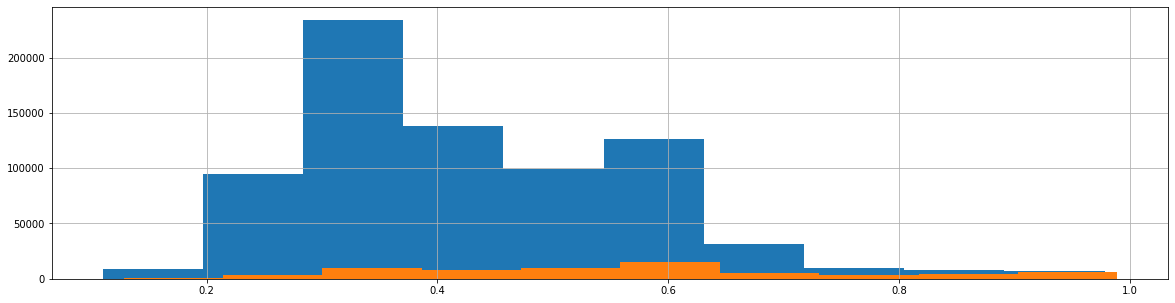

In [222]:
import pylab as pl
evasao_features = evasao.drop(columns=['Status_evadido']).values
evasao_target = evasao['Status_evadido'].values
evasao['predict_proba_RF'] = classifier_XG_opt.predict_proba(evasao_features)[:,1]
evasao.groupby('Status_evadido')['predict_proba_RF'].hist()

Vsiualizando a probabil:

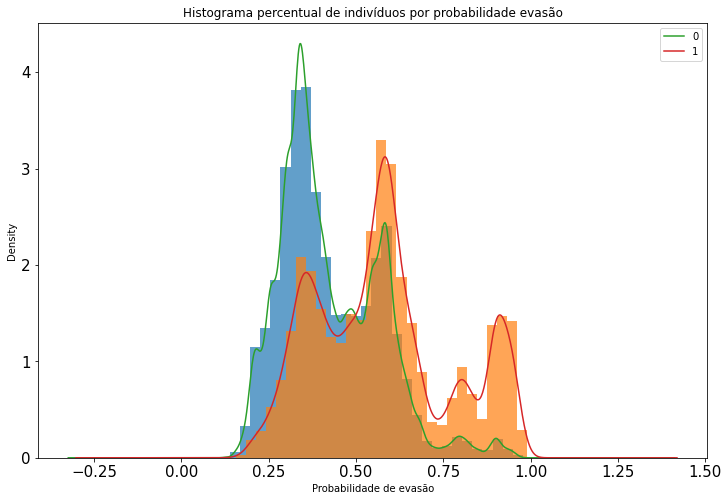

In [223]:
ax = evasao.groupby('Status_evadido')['predict_proba_RF'].plot(kind='hist', density=True,
        alpha=0.7,
        bins=30,
        title='Histograma percentual de indivíduos por probabilidade evasão',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15,
        legend={"Evadido", "Não Evadido"})
plt.xlabel('Probabilidade de evasão')
ax = evasao.groupby('Status_evadido')['predict_proba_RF'].plot.kde()


Mapeando os alunos no modelo por grupo de risco:

In [235]:
q = evasao['predict_proba_RF'].quantile([0, 0.07, 0.673, 0.957, 1.0])
q = pd.DataFrame(q)
q.columns = ['prob']
q

,prob
0.000,0.109998
0.070,0.250346
0.673,0.504496
0.957,0.751446
1.000,0.989108


In [236]:
analise_RF = {'Risco de Evasao':["Baixo", "Médio-baixo", "Médio-alto", "Alto"], 'Probab. de Evasão': ["Até 25%", "entre 25% e 50%", "entre 50% e 75%", "entre 75% e 100%"], '% da população': ["7%", "60,3%", "28,4%", "4,3%"]}
analise_RF = pd.DataFrame.from_dict(analise_RF, orient='columns')
analise_RF

,Risco de Evasao,Probab. de Evasão,% da população
0,Baixo,Até 25%,7%
1,Médio-baixo,entre 25% e 50%,"60,3%"
2,Médio-alto,entre 50% e 75%,"28,4%"
3,Alto,entre 75% e 100%,"4,3%"


Entendendo a importancia das features no modelo:

Text(0, 0.5, 'Feature Importance Score')

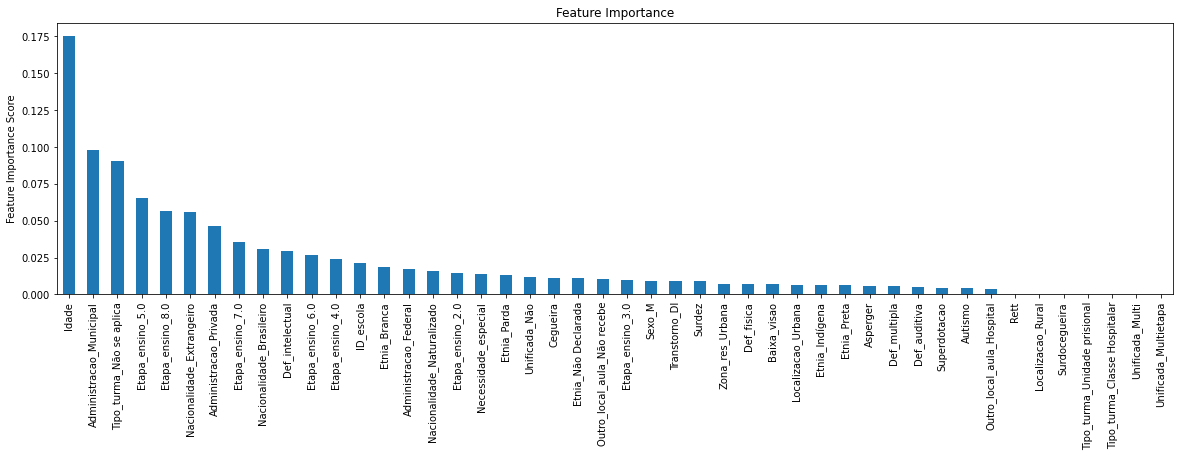

In [237]:
predictors = [x for x in evasao.drop(columns=['Status_evadido', 'predict_proba_RF']).columns]

feat_imp = pd.Series(classifier_XG_opt.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:50]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')

In [245]:
evasao2 = evasao[['Status_evadido', 'Administracao_Municipal']]
total = evasao2.groupby('Administracao_Municipal').count()
evadido = evasao2[evasao2.Status_evadido==1].groupby('Administracao_Municipal').count()
percent = evadido/total
percent.rename(columns={"Status_evadido": "Percentual_de_evasao"})

,Percentual_de_evasao
Administracao_Municipal,
0,0.098380
1,0.057083


In [247]:
evasao3 = evasao[['Status_evadido', 'Idade']]
total = evasao3.groupby('Idade').count()
evadido = evasao3[evasao3.Status_evadido==1].groupby('Idade').count()
percent = evadido/total
percent.rename(columns={"Status_evadido": "Percentual_de_evasao"})

,Percentual_de_evasao
Idade,
6.0,0.060312
7.0,0.056805
8.0,0.055177
9.0,0.050604
10.0,0.079371
11.0,0.079585
12.0,0.070257
13.0,0.064706
14.0,0.127729
